# 机器学习练习1 - 线性回归

## 线性回归

用函数一个个讲解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split  

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [3]:
## 读取数据
import pandas as pd
import chardet
path = '/Users/Lenovo/Desktop/regress_data1.csv'
with open(path, 'rb') as f:  
    result = chardet.detect(f.read())  
    encoding = result['encoding'] 
data = pd.read_csv(path,encoding=encoding) ## data 是dataframe 的数据类型
  

In [4]:
cols = data.shape[1]
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1:]

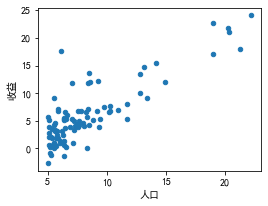

In [5]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [6]:
X_data.insert(0, 'Ones', 1)


从数据中分离出特征属性X和目标向量Y，并对模型参数进行初始化，同时计算当前的损失。

观察下 X (训练集) and y (目标变量)是否正确.

In [7]:
X_data.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y_data.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy数组，所以我们需要从dataframeX_data和Y_data中读取数据，然后才能使用它们。
此外，我们还需要初始化w。

In [9]:
X=X_data.values
Y=y_data.values.reshape(-1, 1)
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

看下维度

In [10]:
(X.shape,Y.shape, W.shape)

((97, 2), (97, 1), (2, 1))

对于线性回归问题，损失函数可以表示为均方误差：  
  
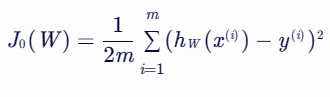

其中，$m$是样本数量，$h_W(x)$ 是模型预测值，$y$ 是真实值，$W$ 是权重矩阵。  
  
而为了防止模型过拟合，我们引入L2范数正则项。正则化后的损失函数如下  
  
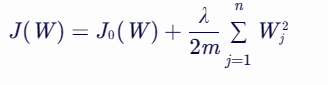 
  
其中，$n$是特征数量（不包括截距项），$\lambda$ 是正则化参数，用于控制正则化的强度。  
  
使用梯度下降法优化损失函数，我们需要计算损失函数关于每个权重 $W_j$ 的梯度。  
  
首先，计算原损失函数 $J_0(W)$ 的梯度  
  
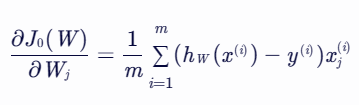
  
然后，计算L2范数正则项的梯度  
  
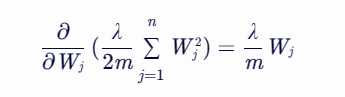 
  
两者相加，得到总的梯度  
  
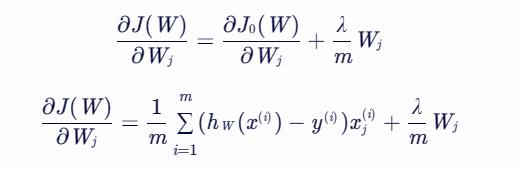
  
接着我们可以更新权重  
  
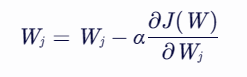
  
代入求得的梯度的表达式，可得 
  
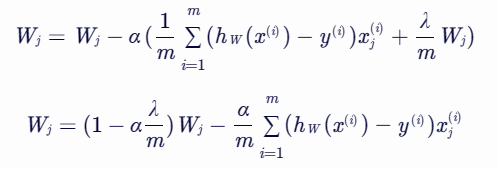
$\alpha$ 是学习率，用于控制每次权重更新的步长。  

定义含L2正则项的损失函数

In [11]:
def computeCostRidge(X, Y, W, alpha):  
    m = X.shape[0]  
    Y_hat = np.dot(X, W)  
    loss = np.sum((Y_hat - Y) ** 2) / (2 * m)  
    regularization = (alpha / (2 * m)) * np.sum(W[1:] ** 2)   
    total_loss = loss + regularization  
    return total_loss  

梯度下降，含L2正则项
    

In [12]:
def gradientDescentRidge(X, Y, W, alpha, reg_param):  
    m = X.shape[0]  
    Y_hat = np.dot(X, W)  
    dW = (1 / m) * X.T @ (Y_hat - Y)  
    dW_reg = reg_param * (1 / m) * W  
    dW_reg[0] = 0   
    dW += dW_reg  
    W -= alpha * dW  
    return W  

训练

In [13]:
def linearRegressionRidge(X, Y, alpha, reg_param, iters):  
    loss_his = []  
    feature_dim = X.shape[1]  
    W = np.zeros((feature_dim, 1))    
    for i in range(iters):  
        loss = computeCostRidge(X, Y, W, reg_param)  
        loss_his.append(loss)  
        W = gradientDescentRidge(X, Y, W, alpha, reg_param)  
    return loss_his, W  

In [14]:
def predict(X, W):  
    y_pre = np.dot(X, W)  
    return y_pre 

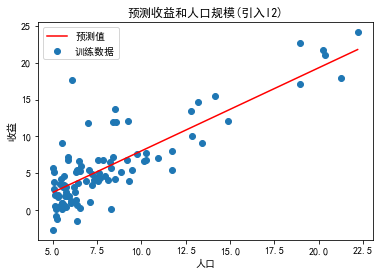

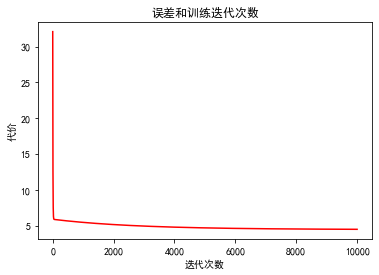

In [25]:

alpha = 0.001  
reg_param = 0.1  
iters = 10000 
loss_his, W_ridge = linearRegressionRidge(X, Y, alpha, reg_param, iters) 


x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W_ridge[0, 0] + (W_ridge[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set(xlabel='人口',
       ylabel='收益',
       title='预测收益和人口规模(引入l2)')
plt.show()

plt.plot(np.arange(iters), loss_his, 'r')  
plt.xlabel('迭代次数')  
plt.ylabel('代价')  
plt.title('误差和训练迭代次数')  
plt.show()



## 单变量线性回归

用类来实现

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.